# diabetes


In [18]:
import pandas as pd

In [19]:
dataset=pd.read_csv("diabetes.csv")

In [20]:
dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
print("keys of dataset:\n",dataset.keys())

keys of dataset:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [22]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
print("shape of Glucose:",dataset['Glucose'].shape)

shape of Glucose: (768,)


In [10]:
print("BloodPressure:",dataset['BloodPressure'])

BloodPressure: 0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64


In [11]:
print("Insulin:",dataset['Insulin'])

Insulin: 0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64


In [12]:
print("shape of Insuline:",dataset['Insulin'].shape)

shape of Insuline: (768,)


In [13]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(dataset['BloodPressure'],dataset['Insulin'],random_state=0)

In [14]:
print("X_tarin shape:",X_train.shape)
print("y_train shape:",y_train.shape)

X_tarin shape: (576,)
y_train shape: (576,)


In [15]:
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)



X_test shape: (192,)
y_test shape: (192,)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [24]:
import numpy as np

X_train = np.array(X_train).reshape(-1, 1)

In [25]:
import numpy as np

X_train = np.array(X_train).reshape(-1, 1)

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
X_new=np.array([[5,2.9,1,0.2]])
print("X_new.shape:",X_new.shape)

X_new.shape: (1, 4)


In [43]:
# # Assuming X_new is your new data
# # Ensure X_new has the same preprocessing as X_train (label encoding, missing value handling, etc.)
# # Convert X_new to a 2D array if it's a DataFrame
# X_new_array = X_new.values
X_new=np.array(X_new).reshape(-1,1)

# Predict using the trained model
predictions = knn.predict(X_new)

# Print the predictions
print("Predictions:", predictions)
print("Predicted Insulin",dataset['Insulin'][predictions])

# predictions = []
# for instance in X_new:
#     prediction = knn.predict([instance])  # Reshape instance to match the model's expected input
#     predictions.append(prediction)

# # Convert predictions to a numpy array for easier indexing
# predictions = np.array(predictions)
# print("Predictions:", predictions)
# print("Predicted gpas:", dataset['gpa'][predictions])

# prediction=knn.predict(X_new)
# print("Predictiion:",prediction)
# print("Predicted gpa:", dataset['gpa'][prediction])

Predictions: [0 0 0 0]
Predicted Insulin 0    0
0    0
0    0
0    0
Name: Insulin, dtype: int64


In [44]:
X_test=np.array(X_test).reshape(-1,1)
y_pred = knn.predict(X_test)
print("Test set predictions: \n",y_pred)

Test set predictions: 
 [  0   0   0   0   0   0   0 120  18   0   0   0   0   0   0   0   0   0
 120  86   0   0   0   0   0   0   0   0   0   0   0   0 120   0  86   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 120   0   0   0   0   0   0   0  86  99   0   0
   0   0   0   0   0  18   0   0   0   0   0   0   0   0   0   0 120   0
   0   0  18   0   0   0   0 120   0   0 120   0   0   0   0   0   0   0
   0   0  86   0   0   0   0   0   0   0   0   0   0  86  18   0  18   0
   0  18   0   0   0   0  18 120   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  18   0  99   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  18   0   0   0]


In [45]:
print("Test set score:{:.2f}".format(np.mean(y_pred==y_test)))

Test set score:0.49


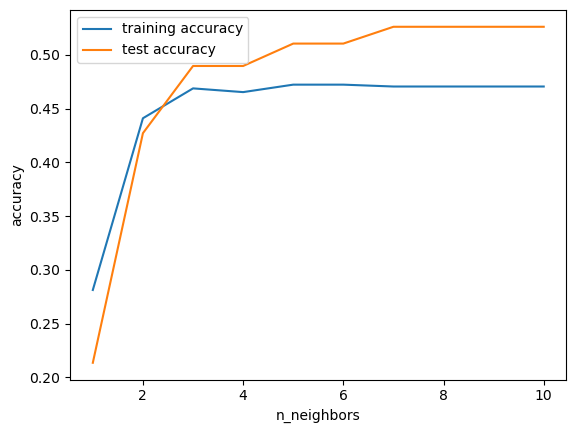

In [50]:

%matplotlib inline
import matplotlib.pyplot as plt
training_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,11)
for n_neighbors1 in neighbors_settings:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors1)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()